In [481]:
import matplotlib
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [482]:
mvps = pd.read_csv("mvps.csv")

In [483]:
# cleaning up mvps for only necessary columns
# ap nfl mvp voting changed from the 22-23 season onwards
def adjust_voting(row):
    if row['Year'] >= 2022:
        if row['1st Place'] > 0:
            return row['1st Place']
        else:
            return 0
    return row['Votes']

mvps['Votes'] = mvps.apply(adjust_voting, axis=1)

# 5 wrs in mvp voting since 2000, w/ only 1 (Kupp) receiving a 1st place vote
wrs = mvps[mvps["Pos"] == "WR"]
wrs = wrs[["Player", "Pos", "Votes", "Share", "Year"]]

# 18 rbs in mvp voting since 2000, w/ 4 winning (Faulk, Alexander, Tomlinson, Peterson)
rbs = mvps[mvps["Pos"] == "RB"]
rbs = rbs[["Player", "Pos", "Votes", "Share", "Year"]]

# 10 non-offensive positions in mvp voting since 2000
non_off = mvps[~mvps["Pos"].isin(["QB", "WR", "RB"])]
non_off = not_off[["Player","Pos", "Votes", "Share", "Year"]]

# only qbs and rbs - only positions to have won mvp since 2000
mvps = mvps[mvps["Pos"].isin(["QB", "RB"])]
mvps = mvps[mvps["Votes"] > 0] # condense old/new ap nfl voting

mvps = mvps[["Player", "Year", "Votes", "Share"]]
mvps['Share'] = mvps['Share'].str.replace('%', '').astype(float)

mvps.to_csv("cleaned-mvps.csv")

mvps

,Player,Year,Votes,Share
0,Marshall Faulk,2000,24.0,48.0
1,Donovan McNabb,2000,11.0,22.0
2,Eddie George,2000,8.0,16.0
3,Rich Gannon,2000,5.0,10.0
5,Peyton Manning,2000,1.0,2.0
...,...,...,...,...
81,Patrick Mahomes,2022,48.0,98.0
82,Jalen Hurts,2022,1.0,38.6
83,Josh Allen,2022,1.0,30.2
96,Lamar Jackson,2023,49.0,98.6


In [484]:
wrs

,Player,Pos,Votes,Share,Year
80,Cooper Kupp,WR,1.0,2%,2021
85,Justin Jefferson,WR,0.0,11%,2022
89,A.J. Brown,WR,0.0,0.2%,2022
93,Tyreek Hill,WR,0.0,0.2%,2022
101,Tyreek Hill,WR,0.0,12%,2023


In [485]:
rbs

,Player,Pos,Votes,Share,Year
0,Marshall Faulk,RB,24.0,48%,2000
2,Eddie George,RB,8.0,16%,2000
7,Marshall Faulk,RB,17.5,35%,2001
15,Priest Holmes,RB,1.0,2.1%,2002
20,Jamal Lewis,RB,5.0,10%,2003
21,Priest Holmes,RB,3.0,6%,2003
25,Shaun Alexander,RB,19.0,38%,2005
28,Tiki Barber,RB,6.0,12%,2005
30,LaDainian Tomlinson,RB,44.0,88%,2006
37,Michael Turner,RB,4.0,8%,2008


In [486]:
non_off

,Player,Pos,Votes,Share,Year
4,Ray Lewis,MLB,1.0,2%,2000
10,Brian Urlacher,MLB,2.0,4%,2001
14,Derrick Brooks,RLB,1.0,2.1%,2002
22,Ray Lewis,RILB,2.0,4%,2003
38,James Harrison,ROLB,3.0,6%,2008
55,J.J. Watt,LDE,13.0,26%,2014
59,Bobby Wagner,MLB,1.0,2%,2014
86,Nick Bosa,DE,0.0,4%,2022
88,Micah Parsons,LB,0.0,0.4%,2022
105,Myles Garrett,DE,0.0,0.2%,2023


In [487]:
# cleaning all player data
passing = pd.read_csv("passing.csv")

del passing["Unnamed: 0"]
del passing["Rk"]

passing["QBrec"] = passing["QBrec"].astype(str)

passing["Player"] = passing["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
passing["Player"] = passing["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
passing = passing[passing['Pos'] == 'QB'] # only qbs

# following pfr mvp table format
passing = passing[["Player", "Tm", "Pos", "G", "GS", "Cmp", "Att", "Yds", "TD", "Int", "Year"]]

passing.rename(columns={'Att': 'PassAtt'}, inplace=True)
passing.rename(columns={'Yds': 'PassYds'}, inplace=True)
passing.rename(columns={'TD': 'PassTD'}, inplace=True)

passing.to_csv("cleaned-passing.csv")

passing

,Player,Tm,Pos,G,GS,Cmp,PassAtt,PassYds,PassTD,Int,Year
0,Peyton Manning,IND,QB,16,16,357,571,4413,33,15,2000
1,Jeff Garcia,SFO,QB,16,16,355,561,4278,31,10,2000
2,Elvis Grbac,KAN,QB,15,15,326,547,4169,28,14,2000
3,Daunte Culpepper,MIN,QB,16,16,297,474,3937,33,16,2000
4,Brett Favre,GNB,QB,16,16,338,580,3812,20,16,2000
...,...,...,...,...,...,...,...,...,...,...,...
2416,Sean Clifford,GNB,QB,2,0,1,1,37,0,0,2023
2419,Logan Woodside,ATL,QB,1,0,3,4,27,0,1,2023
2421,A.J. McCarron,CIN,QB,2,0,4,5,19,0,0,2023
2438,Aaron Rodgers,NYJ,QB,1,1,0,1,0,0,0,2023


In [488]:
receiving = pd.read_csv("receiving.csv")

del receiving["Unnamed: 0"]
del receiving["Rk"]

receiving["Player"] = receiving["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
receiving["Player"] = receiving["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
receiving = receiving[receiving['Pos'] == 'RB'] # only rbs

# following pfr mvp table format
receiving = receiving[["Player", "Tm", "Pos", "G", "GS", "Rec", "Yds", "TD", "Year"]]

receiving.rename(columns={'Yds': 'RecYds'}, inplace=True)
receiving.rename(columns={'TD': 'RecTD'}, inplace=True)

receiving = receiving.sort_values(by=['Year', 'RecYds'], ascending=[True, False])

receiving.to_csv("cleaned-receiving.csv")

receiving

,Player,Tm,Pos,G,GS,Rec,RecYds,RecTD,Year
16,Marshall Faulk,STL,RB,14,14,81,830,8,2000
28,Tiki Barber,NYG,RB,16,12,70,719,1,2000
33,Charlie Garner,SFO,RB,16,15,68,647,3,2000
41,Ricky Watters,SEA,RB,16,16,63,613,2,2000
39,Edgerrin James,IND,RB,16,16,63,594,5,2000
...,...,...,...,...,...,...,...,...,...
11476,Travis Homer,CHI,RB,16,0,0,0,0,2023
11479,Jordan Mims,NOR,RB,2,0,0,0,0,2023
11485,Jonathan Williams,WAS,RB,1,0,0,0,0,2023
11431,Chris Evans,CIN,RB,8,0,1,-1,0,2023


In [489]:
rushing = pd.read_csv("rushing.csv")

del rushing["Unnamed: 0"]
del rushing["Rk"]


rushing["Player"] = rushing["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
rushing["Player"] = rushing["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
rushing = rushing[rushing['Pos'].isin(['RB', 'QB'])] # both qbs/rbs

# following pfr mvp table format
rushing = rushing[["Player", "Tm", "Pos", "G", "GS", "Att", "Yds", "TD", "Year"]]

rushing.rename(columns={'Att': 'RushAtt'}, inplace=True)
rushing.rename(columns={'Yds': 'RushYds'}, inplace=True)
rushing.rename(columns={'TD': 'RushTD'}, inplace=True)

rushing = rushing.sort_values(by=['Year', 'RushYds'], ascending=[True, False])

rushing.to_csv("cleaned-rushing.csv")

rushing

,Player,Tm,Pos,G,GS,RushAtt,RushYds,RushTD,Year
1,Edgerrin James,IND,RB,16,16,387,1709,13,2000
10,Robert Smith,MIN,RB,16,16,295,1521,7,2000
0,Eddie George,TEN,RB,16,16,403,1509,14,2000
9,Mike Anderson,DEN,RB,16,12,297,1487,15,2000
6,Corey Dillon,CIN,RB,16,16,315,1435,7,2000
...,...,...,...,...,...,...,...,...,...
7769,Nathan Peterman,CHI,QB,2,0,2,-4,0,2023
7652,Cooper Rush,DAL,QB,7,0,12,-5,0,2023
7712,Jameis Winston,NOR,QB,7,0,5,-6,0,2023
7686,Mike White,MIA,QB,6,0,8,-9,0,2023


In [490]:
# defense = pd.read_csv("defense.csv")

# del defense["Unnamed: 0"]
# del defense["Rk"]

# defense["Player"] = defense["Player"].str.replace("*", "", regex=False) # removing pro bowl indicator
# defense["Player"] = defense["Player"].str.replace("+", "", regex=False) # removing all-pro indicator
# defense = defense[~defense['Pos'].isin(['RB', 'QB', 'K', 'WR', 'TE', 'T', 'G', 'OL', 'LS', 'C', 'FB', 
#                                         'K-P', 'LG', 'P', 'RG'])] # filtering offensive positions

# defense = defense[["Player", "Tm", "Pos", "G", "GS", "Solo", "Sk", "Int", "Year"]]

# defense.rename(columns={'Int': 'Int'}, inplace=True)

# defense.to_csv("cleaned-defense.csv")

# defense

In [491]:
# combining all player data and merging with mvps
player_data = passing.merge(receiving, how="outer", on=["Player", "Year", "Tm", "Pos", "G", "GS"])\
                .merge(rushing, how="outer", on=["Player", "Year", "Tm", "Pos", "G", "GS"])\

player_data.to_csv("player-data.csv")

combined = player_data.merge(mvps, how="outer", on=["Player", "Year"])
combined[["Cmp", "PassAtt", "PassYds", "PassTD", "Int", "Rec", "RecYds", "RecTD", 
                     "RushAtt", "RushYds", "RushTD","Votes", "Share"]] =\
                    combined[["Cmp", "PassAtt", "PassYds", "PassTD", "Int", "Rec",
                              "RecYds", "RecTD", "RushAtt", "RushYds", "RushTD", "Votes", "Share"]].fillna(0)
combined = combined[~combined["Tm"].str.contains("TM")]

combined.to_csv("combined.csv")

combined

,Player,Tm,Pos,G,GS,Cmp,PassAtt,PassYds,PassTD,Int,Year,Rec,RecYds,RecTD,RushAtt,RushYds,RushTD,Votes,Share
0,A.J. Feeley,PHI,QB,1,0,10.0,14.0,143.0,2.0,1.0,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A.J. Feeley,PHI,QB,6,5,86.0,154.0,1011.0,6.0,5.0,2002,0.0,0.0,0.0,12.0,6.0,0.0,0.0,0.0
2,A.J. Feeley,MIA,QB,11,8,191.0,356.0,1893.0,11.0,15.0,2004,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0
3,A.J. Feeley,PHI,QB,2,0,26.0,38.0,342.0,3.0,0.0,2006,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
4,A.J. Feeley,PHI,QB,3,2,59.0,103.0,681.0,5.0,8.0,2007,0.0,0.0,0.0,7.0,23.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,Zamir White,LVR,RB,17,4,0.0,0.0,0.0,0.0,0.0,2023,15.0,98.0,0.0,104.0,451.0,1.0,0.0,0.0
5125,Zonovan Knight,NYJ,RB,7,4,0.0,0.0,0.0,0.0,0.0,2022,13.0,100.0,0.0,85.0,300.0,1.0,0.0,0.0
5126,Zonovan Knight,DET,RB,2,0,0.0,0.0,0.0,0.0,0.0,2023,1.0,8.0,0.0,3.0,13.0,0.0,0.0,0.0
5127,Zurlon Tipton,IND,RB,6,0,0.0,0.0,0.0,0.0,0.0,2014,6.0,68.0,1.0,10.0,18.0,0.0,0.0,0.0


In [492]:
# cleaning up team data
teams = pd.read_csv("teams.csv")

del teams["Unnamed: 0"]
teams["Tm"] = teams["Tm"].str.replace("*", "", regex=False) # removing division winner indicator
teams["Tm"] = teams["Tm"].str.replace("+", "", regex=False) # removing wildcard indicator

teams.rename(columns={'Tm': 'Team'}, inplace=True)

teams.to_csv("cleaned-teams.csv")

teams

,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Year
0,Miami Dolphins,11,5,0.688,323,226,97,6.1,1.0,7.1,0.0,7.1,2000
1,Indianapolis Colts,10,6,0.625,429,326,103,6.4,1.5,7.9,7.1,0.8,2000
2,New York Jets,9,7,0.563,321,321,0,0.0,3.5,3.5,1.4,2.2,2000
3,Buffalo Bills,8,8,0.500,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,2000
4,New England Patriots,5,11,0.313,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,Carolina Panthers,2,15,0.118,236,416,-180,-10.6,0.7,-9.9,-7.9,-2.0,2023
762,San Francisco 49ers,12,5,0.706,491,298,193,11.4,0.4,11.8,7.1,4.7,2023
763,Los Angeles Rams,10,7,0.588,404,377,27,1.6,1.4,3.0,2.0,1.0,2023
764,Seattle Seahawks,9,8,0.529,364,402,-38,-2.2,1.3,-1.0,-0.2,-0.8,2023


In [493]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [494]:
combined["Team"] = combined["Tm"].map(nicknames)

# for washington as they have gone through multiple name changes under the same abbreviation
def adjust_team_name(row):
    if row['Tm'] == 'WAS':
        if row['Year'] < 2020:
            return 'Washington Redskins'
        elif 2020 <= row['Year'] < 2022:
            return 'Washington Football Team'
        else:
            return 'Washington Commanders'
    return row['Team']

# Adjusting the team names
combined['Team'] = combined.apply(adjust_team_name, axis=1)

combined.to_csv("combined.csv")

In [495]:
stats = combined.merge(teams, how="outer", on=["Team", "Year"])
stats = stats.apply(pd.to_numeric, errors="ignore")

stats.to_csv("mvp-stats.csv")

Share      1.000000
Votes      0.992706
PassTD     0.296876
PassYds    0.216095
Cmp        0.202390
PassAtt    0.187594
OSRS       0.160337
GS         0.155307
PF         0.155165
W          0.137917
W-L%       0.137325
PD         0.135313
MoV        0.135080
SRS        0.132111
Int        0.102024
RushTD     0.091089
G          0.086891
RushYds    0.050416
RushAtt    0.037786
DSRS       0.034929
RecTD      0.014173
Year       0.000212
RecYds    -0.009854
Rec       -0.015547
SoS       -0.027062
PA        -0.042457
L         -0.136844
Name: Share, dtype: float64


<Axes: >

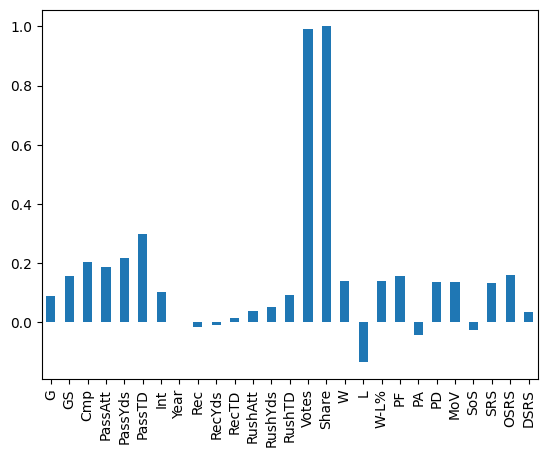

In [496]:
numeric_stats = stats.select_dtypes(include=['number'])
correlation = numeric_stats.corr()["Share"]

print(correlation.sort_values(ascending=False))
correlation.plot.bar() # IT'S A QB AWARD NOOOOOOOOOOOOOO